# Ejercicios Pair Programming - Modulo 2 - Sprint 2 
## Lección 1 - Limpieza III: Valores extremos
### Ana Gonzalez y Sonia Ruiz

**Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.**
- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?
- ¿Cuál es el rango de edad que sufre la mayoría de los ataques?
- Independientemente de la edad, sufren los hombres más ataques que las mujeres?
- ¿En qué mes ocurren más ataques?
- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?
- ¿Cómo han evolucionado los ataques a lo largo del tiempo?
De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Si reducimos esto a una tabla para saber que tenemos ya limpito y que no. **Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I ya dejamos algunas columnas limpitas:

|variable|¿Está limpia?|
|---|---|
|age|✔️ esta en formato string cuando debería ser integer y en algunos casos tenemos rangos de edad   |
|species   |✔️ es un jaleo! Debemos unificar los nombres y reducir a las especies más importantes   |
|country   |✔️ los paises están en mayúsculas, algunos se repiten con algunos cambios   |
|fatal   |✔️ la limpiamos en el pair de Pandas V    |
|year   |✔️ es una columna de tipo float deberíamos convertirla a integer   |
|sex   |✔️ la limpiamos en el pair de Pandas V  |
|fecha   |✔️ la limpiamos en el pair de Pandas V   |

Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.
1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df=pd.read_csv('files/attacks_limp2.csv',index_col=0)
df.head()

,year,country,age,species_,month,dead,gender,specie,edad
0,2018,usa,57,White shark,Jun,N,F,white,57.0
1,2018,brazil,18,Tiger shark,Jun,Y,M,tiger,18.0
2,2018,usa,15,"Bull shark, 6'",May,N,M,bull,15.0
3,2018,australia,32,Grey reef shark,May,N,M,grey,32.0
4,2018,england,21,Invalid incident,May,N,M,unspecified,21.0


In [3]:
df['month'].unique()

array(['Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'Aug', 'Jul', nan], dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 0 to 1671
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      1646 non-null   int64  
 1   country   1636 non-null   object 
 2   age       1516 non-null   object 
 3   species_  1543 non-null   object 
 4   month     1491 non-null   object 
 5   dead      1547 non-null   object 
 6   gender    1631 non-null   object 
 7   specie    1543 non-null   object 
 8   edad      1512 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 128.6+ KB


`Al observar los tipos de columnas, podemos ver que solo tenemos dos columnas numericas en las que pueden existir outliers, 'year' y 'edad'.`


2. Identifica visualmente los outliers

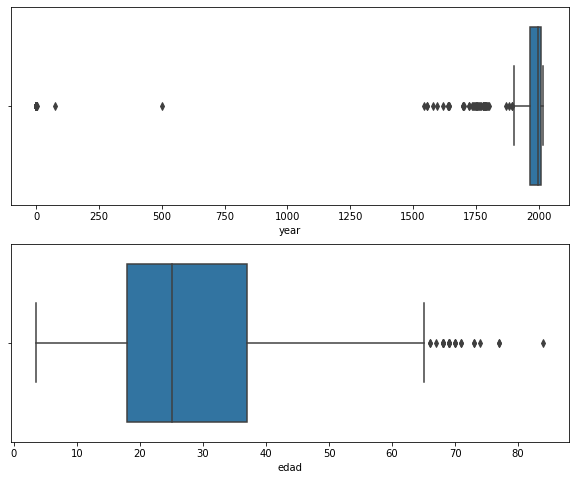

In [21]:
#Creamos dos boxplot de esas dos columnas para ver si tienen outliers.
fig, ax=plt.subplots(2,1,figsize=(10,8))
#creamos los boxplot de manera individual ya que son solo dos columnas numericas, si fuesen muchas
#  lo hariamos con un for loop.
sns.boxplot(x='year',data=df,ax=ax[0])
sns.boxplot(x='edad',data=df,ax=ax[1])
plt.show()

`Si se observan outliers en ambas columnas`

3. Identifica sobre el dataframe las filas que son outliers

In [4]:
#Crear un dataframe para variables numericas.
df_numericas = df.select_dtypes(include = np.number)
df_numericas

,year,edad
0,2018,57.0
1,2018,18.0
2,2018,15.0
3,2018,32.0
4,2018,21.0
...,...,...
1663,0,NaN
1665,0,NaN
1666,0,NaN
1670,0,NaN


In [5]:
#Creamos una funcion para obtener las filas con valores extremos (outliers)
def sacar_outliers(dataframe):
    dict={}
    for col in dataframe.columns:
        q1=np.nanpercentile(dataframe[col],25)
        q3=np.nanpercentile(dataframe[col],75)
        iqr=q3-q1
        bigotes=1.5*iqr
        outliers=dataframe[(dataframe[col]<q1-bigotes)|(dataframe[col]>q3+bigotes)]

        if outliers.shape[0] > 0:
            dict[col]=(list(outliers.index))
    return dict


In [71]:
#Aplicamos la funcion a nuestro dataframe de variables numericas.
valores_extremos=sacar_outliers(df_numericas)
valores_extremos

{'year': [1498,
  1499,
  1500,
  1501,
  1502,
  1503,
  1504,
  1505,
  1506,
  1507,
  1508,
  1509,
  1510,
  1511,
  1512,
  1513,
  1514,
  1515,
  1516,
  1517,
  1518,
  1519,
  1520,
  1521,
  1522,
  1523,
  1524,
  1525,
  1526,
  1527,
  1528,
  1529,
  1530,
  1531,
  1532,
  1533,
  1534,
  1535,
  1536,
  1537,
  1538,
  1539,
  1540,
  1541,
  1542,
  1543,
  1544,
  1545,
  1546,
  1547,
  1548,
  1550,
  1551,
  1552,
  1553,
  1554,
  1555,
  1556,
  1557,
  1558,
  1559,
  1560,
  1561,
  1562,
  1563,
  1564,
  1565,
  1566,
  1567,
  1568,
  1569,
  1570,
  1572,
  1573,
  1574,
  1575,
  1576,
  1577,
  1578,
  1579,
  1582,
  1583,
  1584,
  1585,
  1586,
  1588,
  1589,
  1590,
  1591,
  1592,
  1593,
  1594,
  1595,
  1596,
  1597,
  1598,
  1599,
  1600,
  1601,
  1602,
  1603,
  1604,
  1605,
  1607,
  1608,
  1609,
  1610,
  1611,
  1612,
  1613,
  1614,
  1615,
  1616,
  1617,
  1618,
  1620,
  1621,
  1622,
  1623,
  1624,
  1625,
  1626,
  1627,
  1628,


In [68]:
#Hacemos una list comprehension para obtener los indices de las filas con outliers.
valores_extremos2=[indice for lista in valores_extremos.values() for indice in lista]
valores_extremos2.sort()
len(valores_extremos2)
valores_extremos2

TypeError: 'dict_values' object is not subscriptable

In [61]:
#mostramos las filas con outliers en el dataframe.
df_outliers=df.loc[valores_extremos2]
df_outliers.index

/tmp/ipykernel_11704/1787917777.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_outliers=df.loc[valores_extremos2]


Int64Index([1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545,
            ...
            1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535],
           dtype='int64', length=176)

4. Reemplaza los outliers por el estadístico más correcto.

In [77]:
df_replace=df.copy()

In [76]:
mediana_años=df['year'].median()
mediana_edad=df['edad'].median()
print('La mediana de la columna "year" es',mediana_años)
print('La mediana de la columna "edad" es',mediana_edad)

La mediana de la columna "year" es 1998.0
La mediana de la columna "edad" es 25.0


In [78]:
for k,v in valores_extremos.items():
    median=df[k].median()
    for i in v:
        df_replace.loc[i,k]=median

In [79]:
#comprobamos que uno de los registros que tenia ouliers enla columna edad ha sido sustituido por la mediana.
df_replace[df_replace['species_']=='3.5 m shark']

,year,country,age,species_,month,dead,gender,specie,edad
12,2018,australia,69,3.5 m shark,Mar,N,M,unspecified,25.0


In [81]:
print('El dataframe original tiene', len(df['year'].unique()), 'valores unicos en la columna "year".')
print('El dataframe con los outliers reemplazados tiene', len(df_replace['year'].unique()), 'valores unicos en la columna "year".')

El dataframe original tiene 147 valores unicos en la columna "year".
El dataframe con los outliers reemplazados tiene 101 valores unicos en la columna "year".


`Vemos que, aparentemente, sí que se han sustituido los outliers.`

In [82]:
#Comprobamos de otra forma que la columna edad no presenta valores extremos. Para ello observamos
#  el boxplot que realizamos al principio de este archivo, donde podemos observar que la columna
#  'edad' presenta outliers en los registros con edades por encima de los 70 años.
df_replace['edad'].isin(df_replace['edad']>70).sum()
#Vemos que no hay ningun registros con edades por encima de 70 años, ya que han sido sustituidos por la mediana.

0

5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [32]:
df_replace.to_csv('files/attacks_limp3.csv')

**Happy coding** 🦈